In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import pyecharts
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Times New Roman'
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 20,}
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 14,}

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


# 读取数据

In [3]:
d1 = pd.read_csv('student-mat.csv', sep=';')

In [5]:
d2 = pd.read_csv('student-por.csv', sep=';')

In [6]:
d1.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
d2.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# 数据整合

In [21]:
df = pd.merge(d1,d2, how='outer')

# 查看缺失值和Nan值

In [22]:
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

# 处理重复值
虽然也没有重复值，还是处理一下

In [24]:
df = df.drop_duplicates()

# 保存干净的数据

In [27]:
df.to_csv('干净数据.csv')

# 分析数据类型

In [6]:
f = open('干净数据.csv')
df = pd.read_csv(f, index_col=0)

In [7]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 分析学校

Text(0.5,1,'Number of students from different schools')

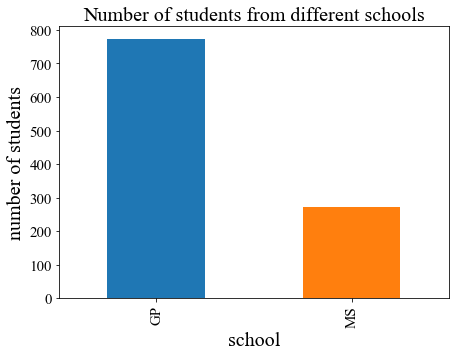

In [22]:
df_school = df.groupby('school')
df_school.size().plot(kind='bar', 
                      figsize=(7,5) ,
                       fontsize=15
                                 )
plt.ylabel('number of students', font1)
plt.xlabel('school', font1)
plt.title('Number of students from different schools', font1)

Text(0.5,1,'final garde divided by school')

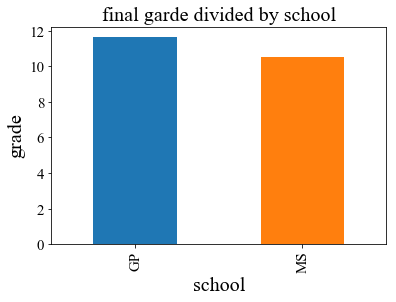

In [21]:
(df_school['G3'].sum() / df_school.count()['G3']).plot(kind='bar',
                                                       fontsize=15,)
plt.ylabel('grade', font1)
plt.xlabel('school', font1)
plt.title('final garde divided by school', font1)

## 分析性别

Text(0,0.5,'grade')

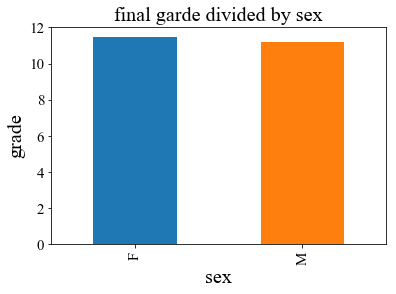

In [35]:
df_sex = df.groupby('sex')
(df_sex.sum()['G3'] / df_sex.count()['G3']).plot(kind='bar',
                                                 fontsize=15)
plt.title('final garde divided by sex',font1)
plt.xlabel('sex',font1)
plt.ylabel('grade',font1)

In [76]:
df_sex.size().index

Index(['F', 'M'], dtype='object', name='sex')

In [80]:
pie = pyecharts.Pie('Sex segement in both school')
pie.add('sex', ['F','M'], df_sex.size().values, is_label_show=True)

In [97]:
df_school_sex = df.groupby(['sex','school'])

In [99]:
bar = pyecharts.Bar("number of sexes per school")
bar.add("M", ['GP','MS'], df_school_sex.size().M.values, is_stack=True)
bar.add('F', ['GP','MS'], df_school_sex.size().F.values, is_stack=True)

Text(0,0.5,'sex count')

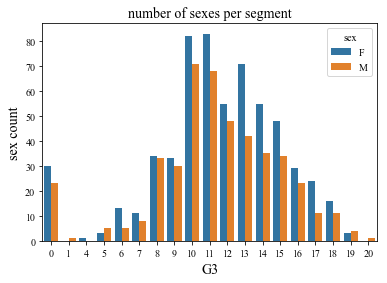

In [47]:
sns.countplot(x='G3', hue='sex', data=df)
plt.title('number of sexes per segment',font2)
plt.xlabel('G3',font2)
plt.ylabel('sex count',font2)

## 分析地址

Text(0,0.5,'address count')

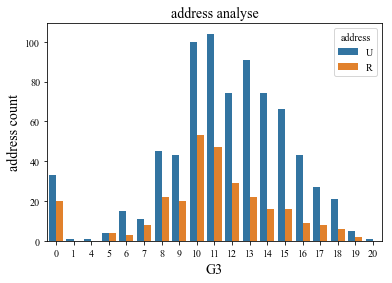

In [50]:
sns.countplot(x='G3',hue='address',data=df)
plt.title('address analysis',font2)
plt.xlabel('G3',font2)
plt.ylabel('address count',font2)

## 分析年龄

Text(0,0.5,'count')

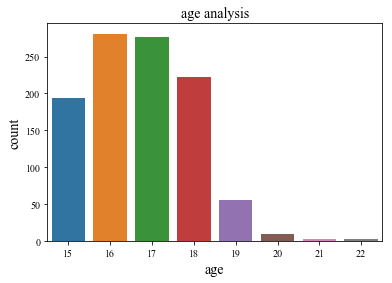

In [54]:
sns.countplot(x='age',data=df)
plt.title('age analysis',font2)
plt.xlabel('age',font2)
plt.ylabel('count',font2)

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


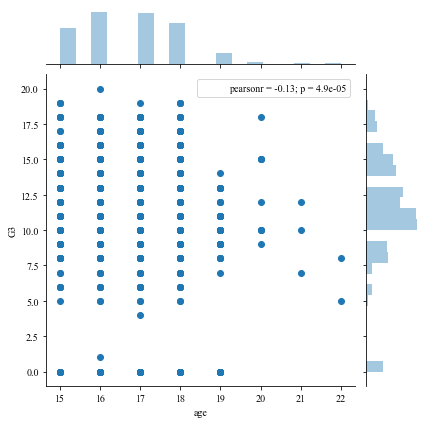

In [58]:
sns.jointplot(x='age',y='G3',data=df)

In [64]:
bar = pyecharts.Bar("age analysis")
bar.add("G1", df.age, df.G1, is_stack=True)
bar.add("G2", df.age, df.G2, is_stack=True)
bar.add("G3", df.age, df.G3, is_stack=True)

## 成绩分析

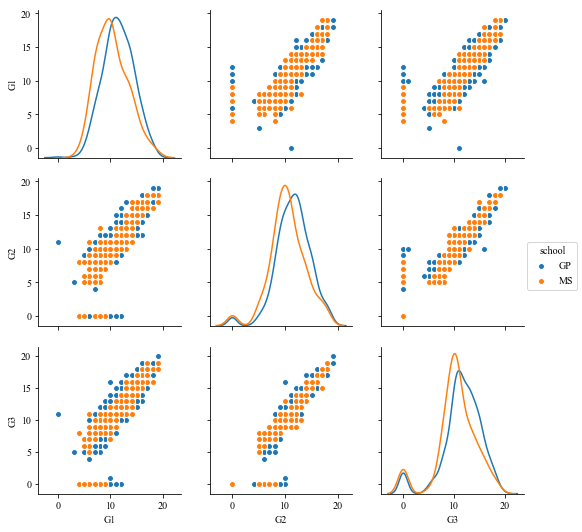

In [109]:
sns.pairplot(df[['G1','G2','G3','school']], hue='school', diag_kind = 'kde')